In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show

In [33]:
# Read in the data:
# topic19/inda_district_boundary.cpg
# topic19/inda_district_boundary.dbf
# topic19/inda_district_boundary.prj
# topic19/inda_district_boundary.shp
# topic19/inda_district_boundary.shx
data = gpd.read_file('./topic19/india_district_boundary.shp')
data

,STATE,DIST,geometry
0,ANDAMAN NICOBAR ISLANDS,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2..."
1,ANDAMAN NICOBAR ISLANDS,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10..."
2,ANDAMAN NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12..."
3,ANDHRA PRADESH,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426..."
4,ANDHRA PRADESH,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174..."
...,...,...,...
713,WEST BENGAL,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539..."
714,WEST BENGAL,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301..."
715,WEST BENGAL,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909..."
716,WEST BENGAL,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


In [8]:
aadhar_centres = pd.read_csv('./topic19/addhar_centers.csv')
aadhar_centres

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957
...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604
75085,4233332,Madhya Pradesh,23.1850,75.7768
75086,4233333,Kerala,9.8970,76.3088
75087,4233334,Himachal Pradesh,31.9713,77.1234


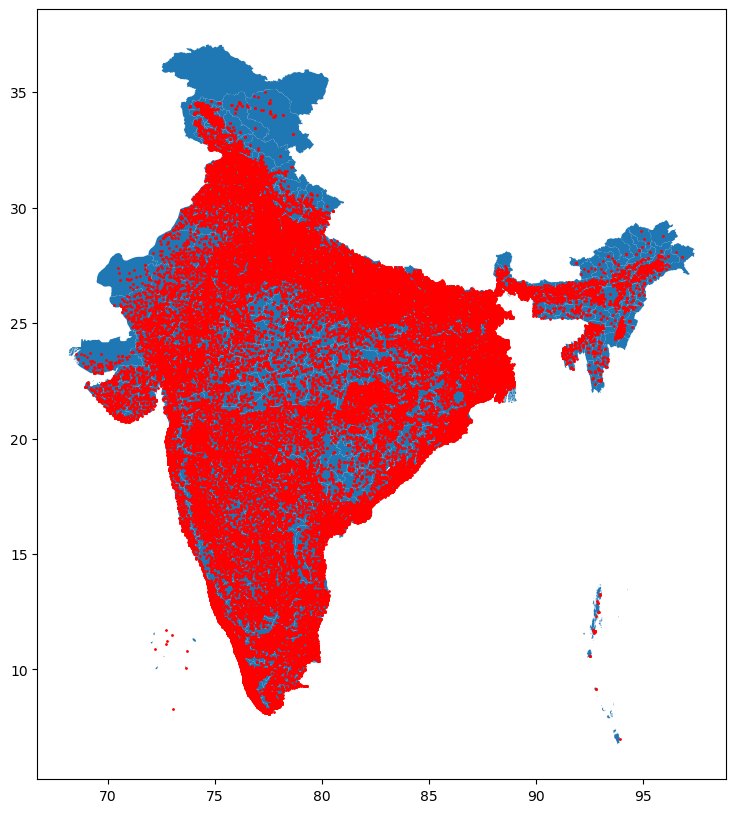

In [9]:
# Plot the data:
fig, ax = plt.subplots(figsize=(10,10))
data.plot(ax=ax)

ax.scatter(aadhar_centres['long'], aadhar_centres['lat'], c='r', s=1);

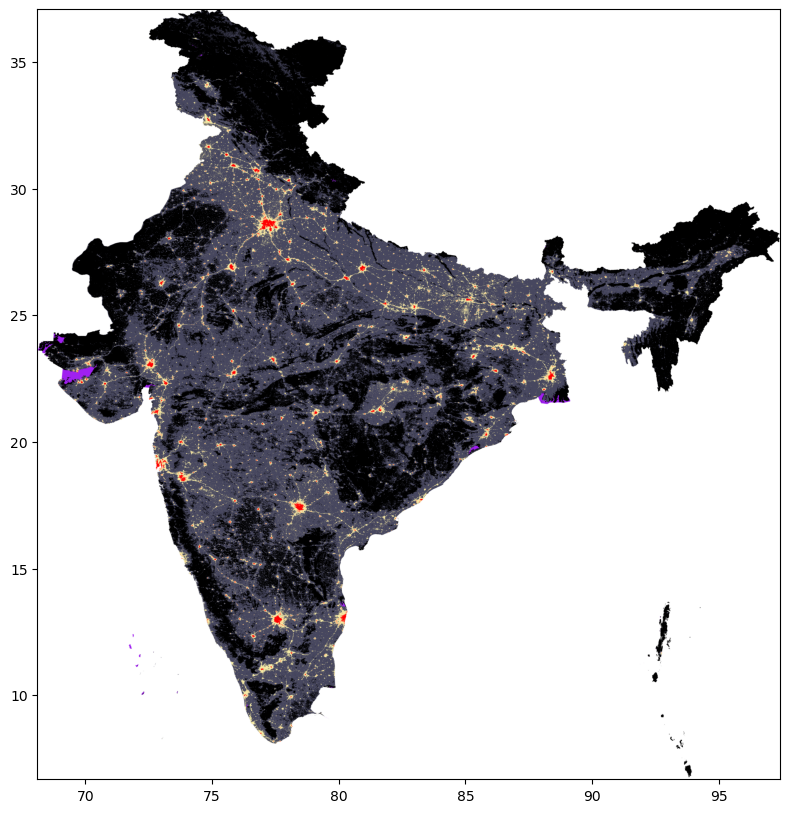

In [10]:
fp = r'./topic19/NTL/2022_India.tif'
img = rasterio.open(fp)
fig, ax = plt.subplots(figsize=(10,10))
show(img, ax=ax);

# Extract district population data

In [11]:
# First line heading, and then remove first two rows
census = pd.read_excel('./topic19/A-1_NO_OF_VILLAGES_TOWNS_HOUSEHOLDS_POPULATION_AND_AREA.xlsx', header=1)
census = census.iloc[2:]
census

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages,Unnamed: 7,Number of towns,Number of households,Population,Unnamed: 11,Unnamed: 12,Area\n (In sq. km),Population per sq. km.,Unnamed: 15,Unnamed: 16,Unnamed: 17
2,0.0,000,00000,INDIA,INDIA @&,Total,597608,43324,7933.0,249501663.0,1210854977,623270258,587584719,3287469.00,382.0,NaN,NaN,NaN
3,0.0,000,00000,INDIA,INDIA $,Rural,597608,43324,0.0,168612897.0,833748852,427781058,405967794,3101473.97,279.0,NaN,NaN,NaN
4,0.0,000,00000,INDIA,INDIA $,Urban,0,0,7933.0,80888766.0,377106125,195489200,181616925,102252.03,3685.0,NaN,NaN,NaN
5,1.0,000,00000,STATE,JAMMU & KASHMIR @&,Total,6337,216,122.0,2119718.0,12541302,6640662,5900640,222236.00,124.0,NaN,NaN,NaN
6,1.0,000,00000,STATE,JAMMU & KASHMIR,Rural,6337,216,0.0,1553433.0,9108060,4774477,4333583,220990.10,91.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20021,NaN,NaN,The same has also been done while working out ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20022,NaN,(ii),Rural and Urban population of Arunachal Prades...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20023,NaN,5,"Area figures in 6 districts (Koriya, Sarguja, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
district_census = census[(census['India/ State/ Union Territory/ District/ Sub-district'] == 'DISTRICT') & (census['Total/\nRural/\nUrban'] == 'Total')][['Name', 'Population', 'Population per sq. km.']]
district_census

,Name,Population,Population per sq. km.
8,Kupwara,870354,366.0
20,Badgam,753745,554.0
41,LADAKH(LEH),133487,3.0
53,Kargil,140802,10.0
65,Punch,476835,285.0
...,...,...,...
19944,Mahe,41816,4646.0
19950,Karaikal,200222,1275.0
19962,Nicobar,36842,20.0
19974,North And Middle Andaman,105597,28.0


In [13]:
district_census['Name'] = district_census['Name'].str.upper().str.strip()

In [14]:
merged = pd.merge(district_census, data, left_on='Name', right_on='DIST', how='outer')
# merged['Name'] = merged['Name'].str.upper()
merged

,Name,Population,Population per sq. km.,STATE,DIST,geometry
0,KUPWARA,870354,366.0,JAMMU KASHMIR,KUPWARA,"POLYGON ((74.54043 34.71828, 74.54313 34.71509..."
1,BADGAM,753745,554.0,JAMMU KASHMIR,BADGAM,"POLYGON ((74.92770 34.02885, 74.92428 34.02295..."
2,LADAKH(LEH),133487,3.0,JAMMU KASHMIR,LADAKH(LEH),"POLYGON ((77.85185 35.13687, 77.85998 35.12860..."
3,KARGIL,140802,10.0,JAMMU KASHMIR,KARGIL,"POLYGON ((76.40975 34.91046, 76.41306 34.90600..."
4,PUNCH,476835,285.0,JAMMU KASHMIR,PUNCH,"POLYGON ((74.57465 33.51015, 74.57380 33.50984..."
...,...,...,...,...,...,...
731,NaN,NaN,NaN,UTTAR PRADESH,PRABUDHNAGAR,"POLYGON ((77.48910 29.63381, 77.48537 29.63233..."
732,NaN,NaN,NaN,WEST BENGAL,ALIPURDUAR,"POLYGON ((89.12441 26.52283, 89.12441 26.52283..."
733,NaN,NaN,NaN,WEST BENGAL,WEST DINAJPUR,"POLYGON ((88.45529 25.62168, 88.45207 25.61987..."
734,NaN,NaN,NaN,WEST BENGAL,JHARGRAM,"POLYGON ((87.06451 22.73141, 87.06673 22.72642..."


In [15]:
merged[merged['DIST'].isnull() | merged['Name'].isnull()][['DIST', 'Name']].to_csv('missing.csv')

In [16]:
# Change row 649 Name to NICOBAR
merged.loc[649, 'Name'] = 'NICOBAR'
merged.loc


In [30]:
def plot_everything_on_state(state_name):
    fig, ax = plt.subplots(figsize=(10,10))
    data[data['STATE'] == state_name.upper()].plot(ax=ax, alpha=0.45)
    show(img, ax=ax, alpha=0.65)
    (minx, miny), (maxx, maxy) = data[data['STATE'] == state_name.upper()].bounds.values.min(axis=0)[:2], data[data['STATE'] == state_name.upper()].bounds.values.max(axis=0)[2:]
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)    
    state_centres = aadhar_centres[aadhar_centres['state'] == state_name]
    ax.scatter(state_centres['long'], state_centres['lat'], c='r', s=1);

In [18]:
def plot_everything_of_district(district_name):
    fig, ax = plt.subplots(figsize=(10,10))
    minx, miny, maxx, maxy = data[data['DIST'] == district_name.upper()]['geometry'].bounds.values[0]
    data[data['DIST'] == district_name.upper()].plot(ax=ax, alpha=0.65)
    show(img, ax=ax, alpha=0.25)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    dist_centres = aadhar_centres[(minx < aadhar_centres['long']) & (miny < aadhar_centres['lat']) & (maxx > aadhar_centres['long']) & (maxy > aadhar_centres['lat'])]
    ax.scatter(dist_centres['long'], dist_centres['lat'], c='r', s=1);

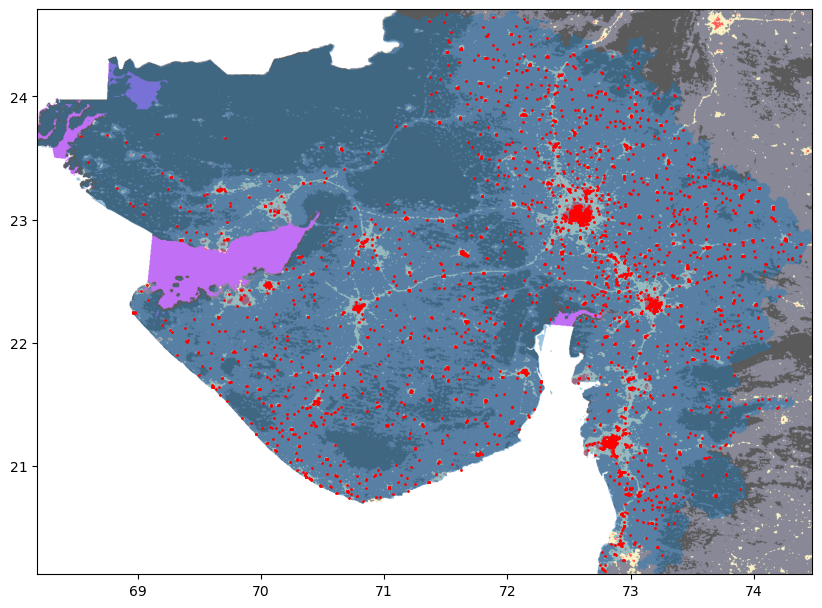

In [19]:
plot_everything_on_state('Gujarat')

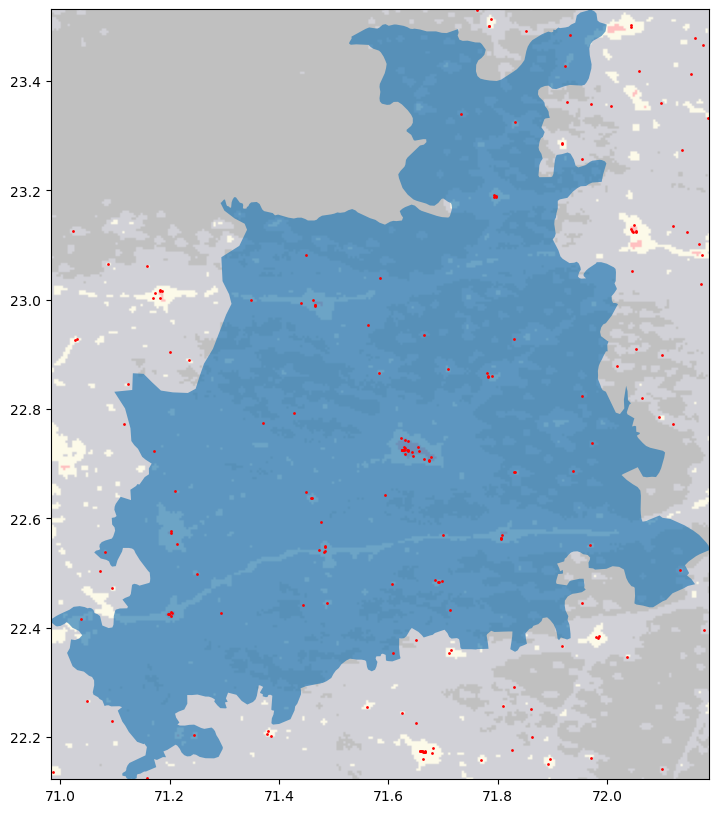

In [20]:
plot_everything_of_district('Surendranagar')

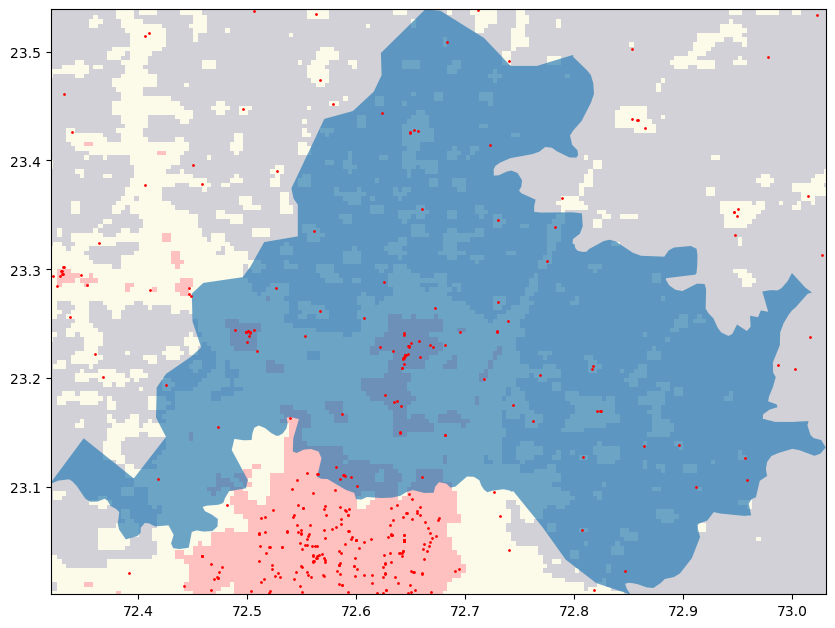

In [21]:
plot_everything_of_district('Gandhinagar')

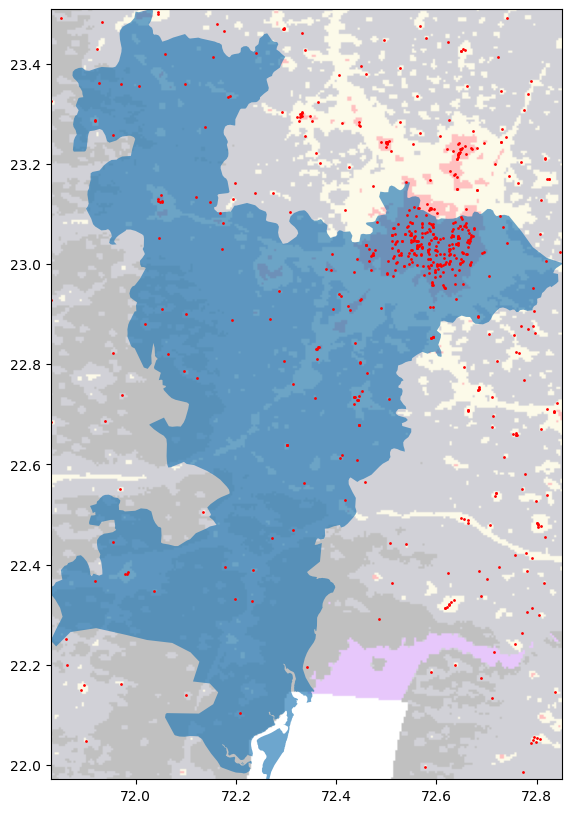

In [22]:
plot_everything_of_district('Ahmadabad')

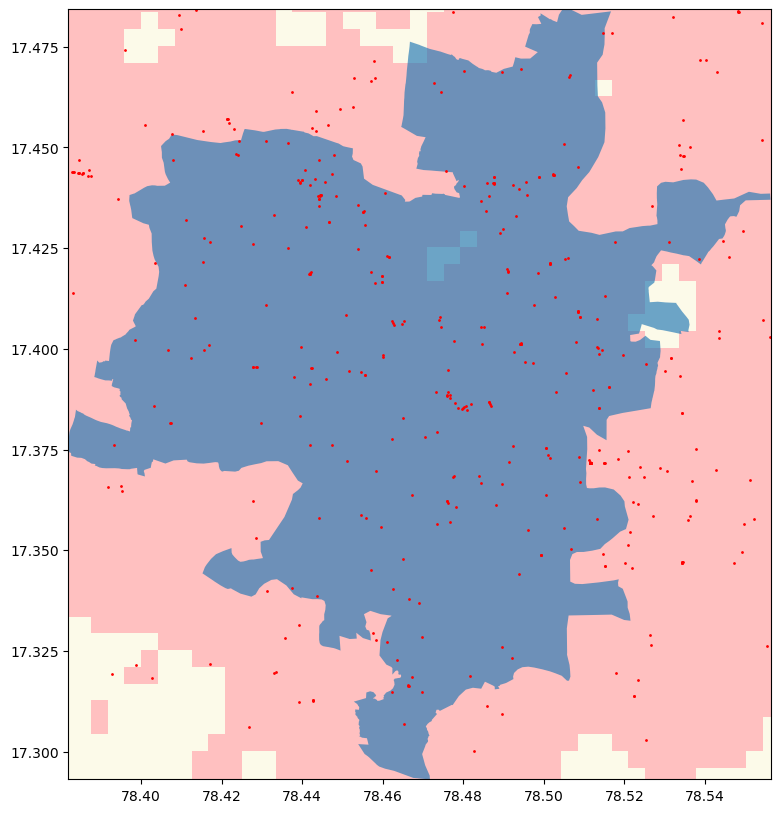

In [24]:
plot_everything_of_district('Hyderabad')

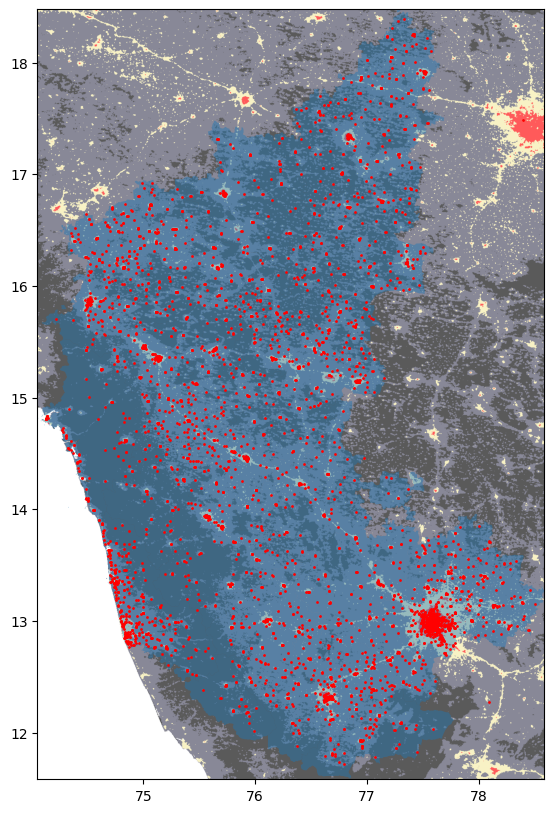

In [31]:
plot_everything_on_state('Karnataka')

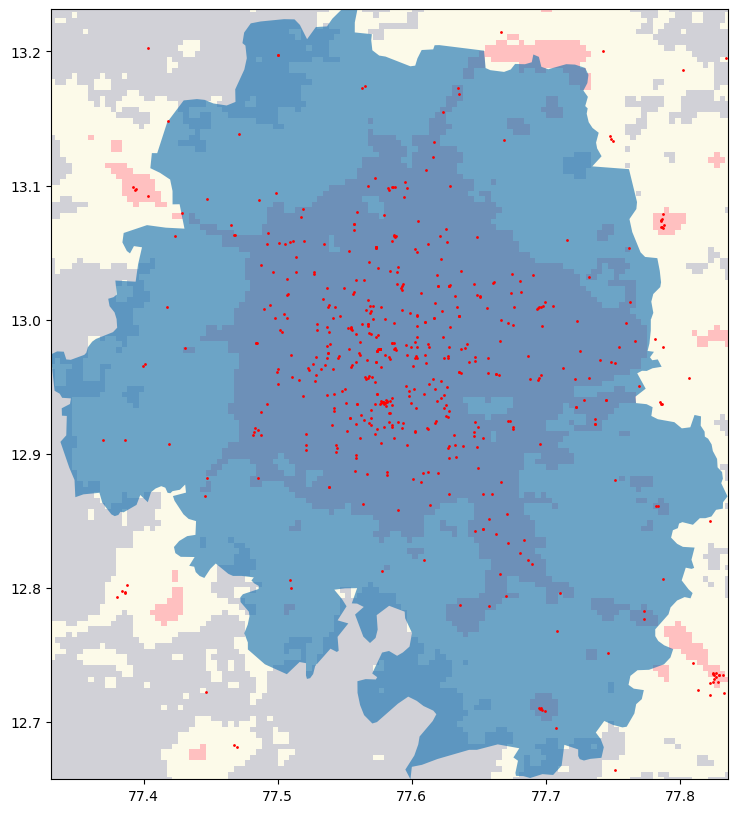

In [32]:
plot_everything_of_district('Bangalore Urban')